In [14]:
#Import the necessary libraries
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import numpy as np
import getData as gD
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import models,layers 

In [2]:
#Get the datasets 
(X,Y) = gD.getDataSet()
m,n = X.shape
nLabels = 10
Y = to_categorical(np.reshape(Y,(len(Y),1)))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
del X,Y #Free up some memory

In [12]:
#Build the model
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (n,)))
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(256,activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = Adam())
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               20992     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total params: 220,682
Trainable params: 220,682
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Train the model and save weights 
from datetime import datetime 
from keras.callbacks import ModelCheckpoint
nEpochs = 75; batchSize = 64
#checkpointer = ModelCheckpoint(filepath = '', verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(x_train,y_train,epochs = nEpochs,batch_size = batchSize,validation_data = (x_test,y_test),verbose = 2)
duration = datetime.now() - start
print("Training completed in:",duration)    

Train on 6985 samples, validate on 1747 samples
Epoch 1/75
 - 1s - loss: 3.4082 - accuracy: 0.2995 - val_loss: 1.5272 - val_accuracy: 0.4820
Epoch 2/75
 - 0s - loss: 1.6522 - accuracy: 0.4092 - val_loss: 1.3717 - val_accuracy: 0.5014
Epoch 3/75
 - 0s - loss: 1.5669 - accuracy: 0.4358 - val_loss: 1.3343 - val_accuracy: 0.5507
Epoch 4/75
 - 0s - loss: 1.4883 - accuracy: 0.4716 - val_loss: 1.2403 - val_accuracy: 0.5804
Epoch 5/75
 - 0s - loss: 1.3911 - accuracy: 0.5071 - val_loss: 1.1229 - val_accuracy: 0.6314
Epoch 6/75
 - 0s - loss: 1.3094 - accuracy: 0.5346 - val_loss: 1.0083 - val_accuracy: 0.6669
Epoch 7/75
 - 0s - loss: 1.2457 - accuracy: 0.5529 - val_loss: 0.9861 - val_accuracy: 0.6840
Epoch 8/75
 - 1s - loss: 1.2233 - accuracy: 0.5675 - val_loss: 0.9415 - val_accuracy: 0.7029
Epoch 9/75
 - 0s - loss: 1.1238 - accuracy: 0.6044 - val_loss: 0.9189 - val_accuracy: 0.7058
Epoch 10/75
 - 0s - loss: 1.0624 - accuracy: 0.6276 - val_loss: 0.8251 - val_accuracy: 0.7338
Epoch 11/75
 - 0s - l

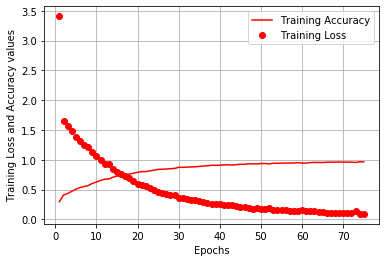

In [13]:
#Plot the models
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,nEpochs+1)
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,loss,'ro',label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss and Accuracy values')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()